## Data Understanding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data into a pandas DataFrame
X = pd.read_csv('../../../data/traininginputs.csv')
y = pd.read_csv('../../../data/trainingoutput.csv')
data = X.merge(y, on='PROC_TRACEINFO')

In [3]:
# Inspect the first few rows of the data
print(data.head())

               PROC_TRACEINFO  OP070_V_1_angle_value  \
0  I-B-XA1207672-190429-00688                  180.4   
1  I-B-XA1207672-190828-00973                  138.7   
2  I-B-XA1207672-190712-03462                  180.9   
3  I-B-XA1207672-190803-00051                  173.5   
4  I-B-XA1207672-190508-03248                  174.5   

   OP090_SnapRingPeakForce_value  OP070_V_2_angle_value  \
0                         190.51                  173.1   
1                         147.70                  163.5   
2                         150.87                  181.2   
3                         159.56                  151.8   
4                         172.29                  177.5   

   OP120_Rodage_I_mesure_value  OP090_SnapRingFinalStroke_value  \
0                       113.64                            12.04   
1                       109.77                            12.12   
2                       109.79                            11.86   
3                       113.25          

In [4]:
# Generate statistical summaries
print(data.describe())

       OP070_V_1_angle_value  OP090_SnapRingPeakForce_value  \
count           34515.000000                   34515.000000   
mean              159.906922                     156.915055   
std                15.662650                      11.271492   
min               101.800000                       0.000000   
25%               148.700000                     149.210000   
50%               158.000000                     156.180000   
75%               169.300000                     164.380000   
max               198.300000                     196.920000   

       OP070_V_2_angle_value  OP120_Rodage_I_mesure_value  \
count           34515.000000                 34515.000000   
mean              159.618236                   113.350222   
std                15.091490                     3.528522   
min                82.000000                    99.990000   
25%               149.400000                   111.040000   
50%               158.700000                   113.160000   
75%  

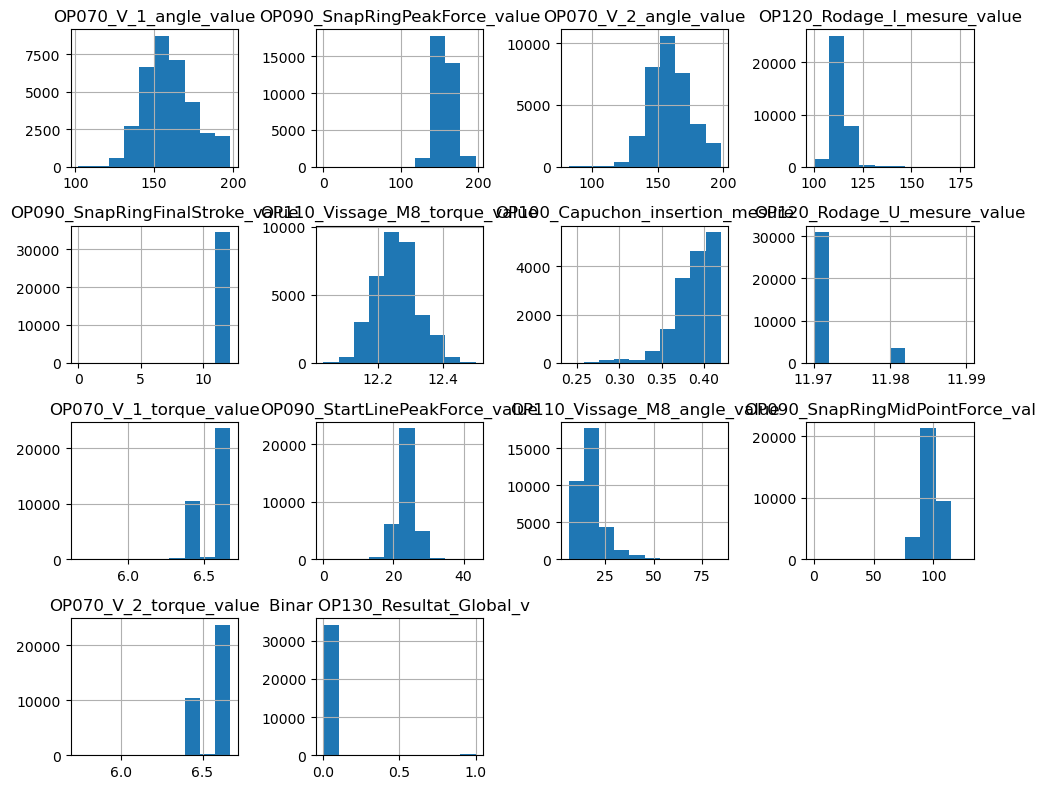

In [5]:
# Visualize the data using histograms
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

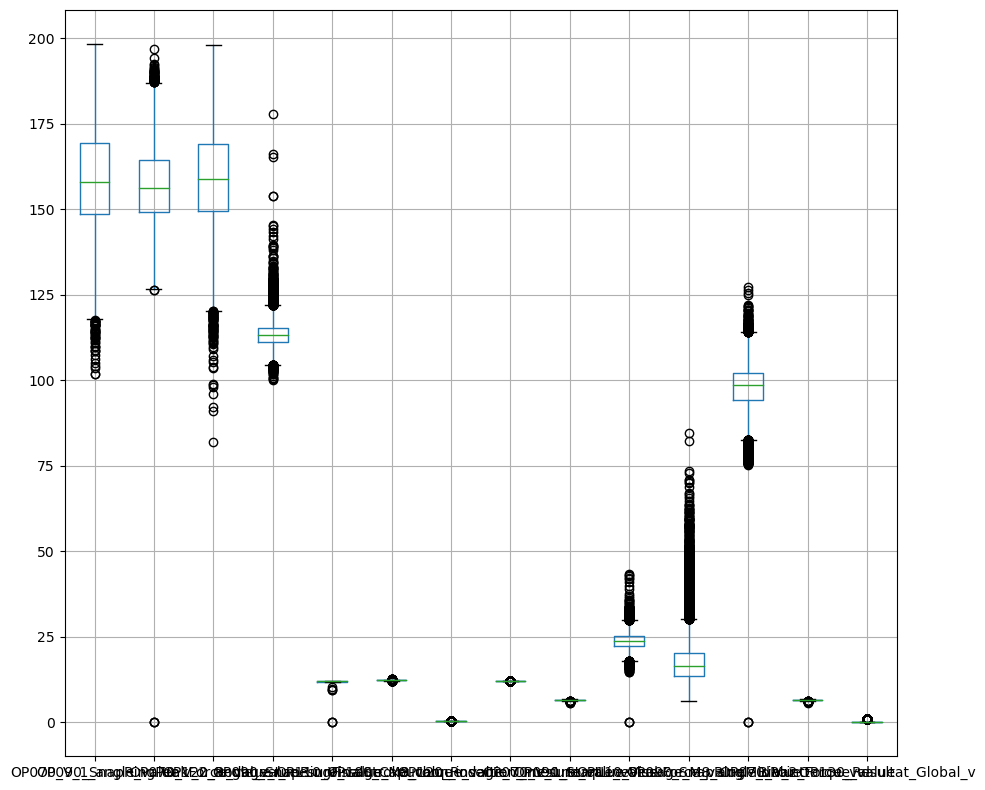

In [6]:
# Visualize the data using box plots
data.boxplot(figsize=(10, 8))
plt.tight_layout()
plt.show()

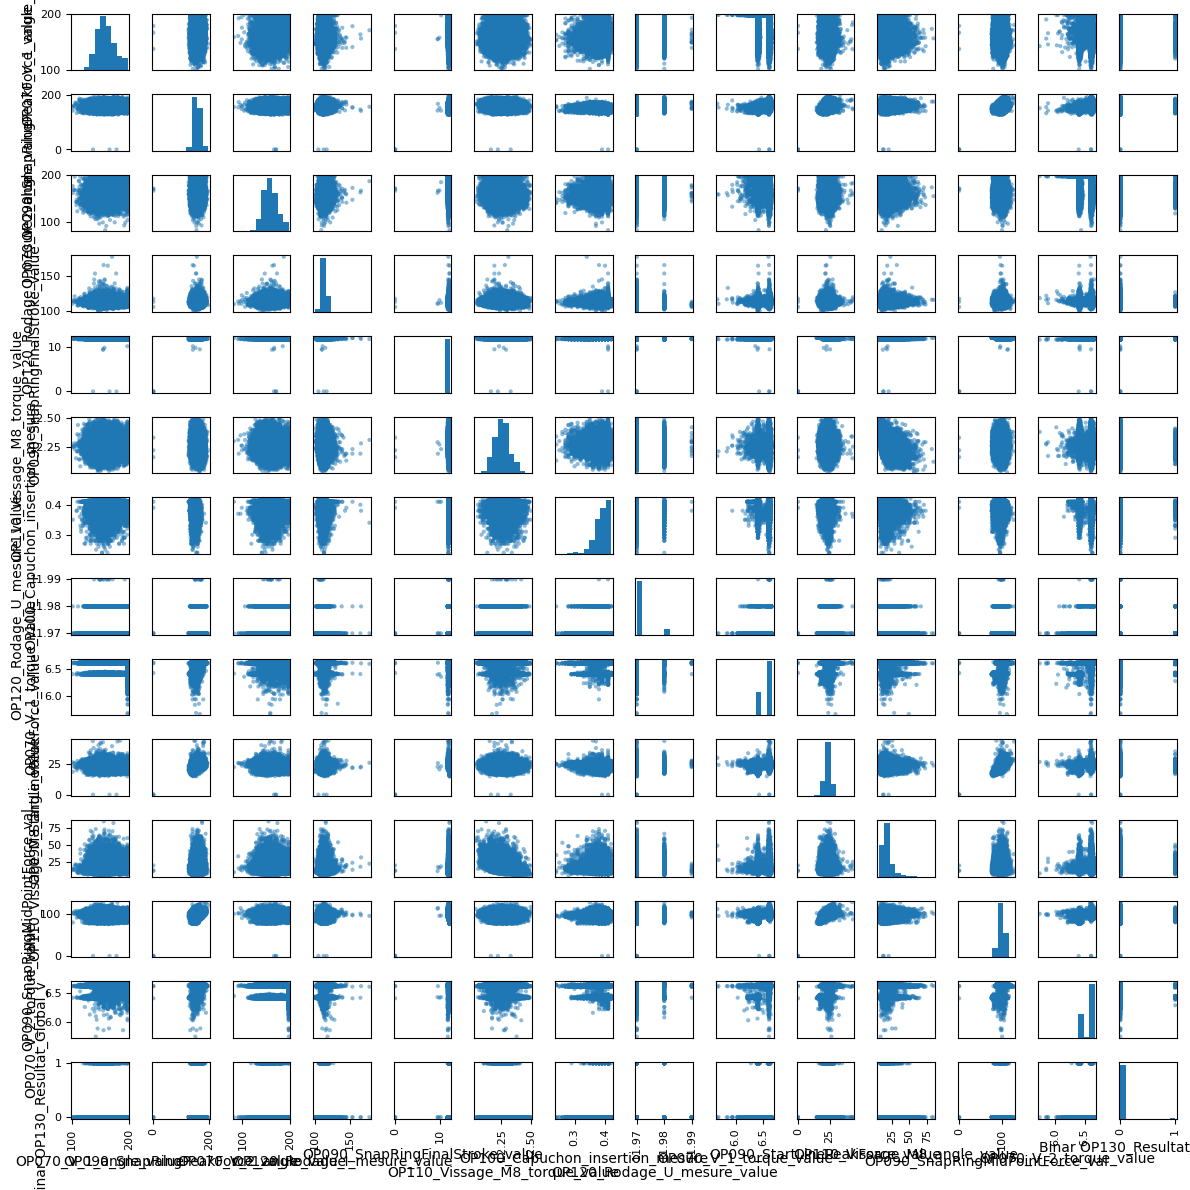

In [7]:
# Visualize the relationships between variables using scatter plots
pd.plotting.scatter_matrix(data, figsize=(12, 12))
plt.tight_layout()
plt.show()

### Data Preparation

In [8]:
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

In [9]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')
data['OP100_Capuchon_insertion_mesure'] = imputer.fit_transform(data['OP100_Capuchon_insertion_mesure'].values.reshape(-1, 1))

In [10]:
# Handling outliers
predictor_variables = [col for col in X.columns[1:].tolist()] # not recommended by gpt3_5 as it assumed the variable already existed
scaler = RobustScaler()
data[predictor_variables] = scaler.fit_transform(data[predictor_variables])

In [11]:
# Correct logic error with previous cell
# This step was not recommended by GPT3_5. It was carried out to prevent errors on subsequent steps
# Handling outliers
predictor_variables = [col for col in X.columns[1:].tolist()]
scaler = RobustScaler()
g = scaler.fit_transform(data[predictor_variables])
data_scaled = pd.DataFrame(g, columns=predictor_variables, index=data.index)
data.drop(columns=predictor_variables, inplace=True)
data = pd.concat([data, data_scaled], axis=1)

In [12]:
# Handling skewed distribution
# This step was ignored as it returns null values that will affect subsequent steps
# data[predictor_variables] = np.log1p(data[predictor_variables])

In [13]:
# Handling imbalanced class distribution
X = data[predictor_variables]
y = data['Binar OP130_Resultat_Global_v']
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

### Modelling

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Split the data into training and testing sets
# X = data[predictor_variables]
# y = data['OP130_Resultat_Global_v']
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, roc_auc_score

In [17]:
# Train and evaluate logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_f1 = f1_score(y_test, logreg_pred)
logreg_roc_auc = roc_auc_score(y_test, logreg_pred)

In [18]:
# Train and evaluate decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_f1 = f1_score(y_test, dt_pred)
dt_roc_auc = roc_auc_score(y_test, dt_pred)

In [19]:
# Train and evaluate random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_f1 = f1_score(y_test, rf_pred)
rf_roc_auc = roc_auc_score(y_test, rf_pred)

In [20]:
# Train and evaluate support vector machine model
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_f1 = f1_score(y_test, svm_pred)
svm_roc_auc = roc_auc_score(y_test, svm_pred)

In [21]:
# Create a summary of the model performances
model_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine'],
    'F1-Score': [logreg_f1, dt_f1, rf_f1, svm_f1],
    'ROC AUC': [logreg_roc_auc, dt_roc_auc, rf_roc_auc, svm_roc_auc]
})

print(model_summary)

                    Model  F1-Score   ROC AUC
0     Logistic Regression  0.635941  0.645005
1           Decision Tree  0.983638  0.983554
2           Random Forest  0.997220  0.997224
3  Support Vector Machine  0.728798  0.721187


### Evaluating Model Performance on Unseen Data

In [41]:
# Read in Validation Data
X_val = pd.read_csv('../../../data/testinputs.csv')
X_val.drop(columns='PROC_TRACEINFO', inplace=True)
y_val = pd.read_csv('../../../data/testoutput.csv')
y_val = y_val['Binar_OP130_Resultat_Global_v']

In [43]:
# Apply transforms to predictor variables
X_val['OP100_Capuchon_insertion_mesure'] = imputer.transform(X_val['OP100_Capuchon_insertion_mesure'].values.reshape(-1, 1))
X_val = pd.DataFrame(scaler.transform(X_val), columns=predictor_variables)

In [44]:
y_pred = rf.predict(X_val)
print(f'f1-score:{f1_score(y_val, y_pred)}')
print(f'AUROC:{roc_auc_score(y_val, y_pred)}')

f1-score:0.0
AUROC:0.5
